In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [2]:
import pandas as pd
import requests

# FRED api key
api_key = '8a3b81dc0d28d72a4619ad931ae7775b'

# FRED api url with series id
url = 'https://api.stlouisfed.org/fred/series/observations?series_id=EFFR&api_key=' + api_key + '&file_type=json'

# make call to FRED api
response = requests.get(url)

# convert response to json
data = response.json()

# convert json to a pandas dataframe
ffr = pd.DataFrame(data['observations'])

# cleanup
ffr = ffr[ffr.date > '2022-04-06']
ffr = ffr [['date', 'value']]
ffr = ffr.rename(columns = {'value': 'DFF', 'date': 'Date'})
ffr = ffr.reset_index(drop = True)
ffr.DFF = pd.to_numeric(ffr.DFF.str.replace(".", ""), errors='coerce')


In [3]:
import requests
from bs4 import BeautifulSoup

# URL to webscrape
url = 'https://www.cmegroup.com/markets/interest-rates/cme-fedwatch-tool.html'

In [4]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.common.action_chains import ActionChains
from selenium import webdriver
import time

driver = webdriver.Chrome(executable_path='C:/temp/chromedriver.exe')
driver.set_page_load_timeout(300)

driver.get("https://www.cmegroup.com/trading/interest-rates/countdown-to-fomc.html")

time.sleep(2)

driver.switch_to.frame(driver.find_element(By.TAG_NAME,"iframe"))
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(2)
element = driver.find_element(By.LINK_TEXT, "Downloads")
driver.execute_script("arguments[0].click();", element)

time.sleep(2)

links = driver.find_elements(By.TAG_NAME, "a")

data = {}
for link in links:
    data[link.text] = link.get_attribute('href')
    
driver.quit()


In [5]:
data

{'': 'https://cmegroup-tools.quikstrike.net/User/QuikStrikeView.aspx?viewitemid=IntegratedFedWatchTool&userId=lwolf&jobRole=&company=&companyType=&userId=lwolf&jobRole=&company=&companyType=&insid=91591401&qsid=9cc30fdc-ed72-4e09-9c41-cca252e5af95#',
 'Current': "javascript:__doPostBack('ctl00$MainContent$ucViewControl_IntegratedFedWatchTool$lbCurrent','')",
 'Compare': "javascript:__doPostBack('ctl00$MainContent$ucViewControl_IntegratedFedWatchTool$lbCompare','')",
 'Probabilities': "javascript:__doPostBack('ctl00$MainContent$ucViewControl_IntegratedFedWatchTool$lbPTree','')",
 'Historical': "javascript:__doPostBack('ctl00$MainContent$ucViewControl_IntegratedFedWatchTool$lbHistorical','')",
 'Downloads': "javascript:__doPostBack('ctl00$MainContent$ucViewControl_IntegratedFedWatchTool$lbDownloads','')",
 'Prior Hikes': "javascript:__doPostBack('ctl00$MainContent$ucViewControl_IntegratedFedWatchTool$lbMH','')",
 'Chart': "javascript:__doPostBack('ctl00$MainContent$ucViewControl_Integrat

In [6]:
reports = {}
for k,v in data.items():
    if '20' in k:
        reports[k] = v

In [7]:
dfs = {}
for key, url in reports.items():
    dfs[key] = pd.read_csv(url)
    dfs[key]['contract'] = key

In [8]:
for k,v in dfs.items():
    print(len(v))

169
201
235
251
251
251
251
251
237
180
180
141
82
82
16
0
0


In [85]:
len(dfs)

17

In [86]:
df = pd.concat([i for i in dfs.values()])

In [87]:
df.sort_values(by = 'Date', ascending = True)

,Date,(0-25),(25-50),(50-75),(75-100),(100-125),(125-150),(150-175),(175-200),(200-225),...,(1825-1850),(1850-1875),(1875-1900),(1900-1925),(1925-1950),(1950-1975),(1975-2000),(2000-2025),(2025-2050),(2050-2075)
180,01/03/2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180,01/03/2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180,01/03/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,01/03/2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
70,01/03/2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,12/30/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,12/30/2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,12/30/2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
10,12/30/2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
df = df[df['Date'].notna()]

In [89]:
rates = [i for i in df.columns if i != 'Date' and i != 'contract']

In [90]:
rateset = list(set(rates))

In [91]:
ratevals = []
for i in rates:
    a = i.replace('(', "").replace(")","").split('-')[0]
    if float(a) < 25:
        a = float(a) * 1000
    
    b = i.replace('(', "").replace(")","").split('-')[1]
    if float(b) < 25:
        b = float(b) * 1000

    val = (int(a) + int(b)) / 2
    ratevals.append(str(val))

In [92]:
rename = dict(zip(rates, ratevals))

In [93]:
ffr['Date'] =  pd.to_datetime(ffr['Date'], infer_datetime_format=True)
df['Date'] =  pd.to_datetime(df['Date'], infer_datetime_format=True)
df['contract'] =  pd.to_datetime(df['contract'], infer_datetime_format=True)

In [94]:
df.rename(columns = rename, inplace = True)

In [95]:
df.columns.sort_values()

Index(['1012.5', '1037.5', '1062.5', '1087.5', '1112.5', '112.5', '1137.5',
       '1162.5', '1187.5', '12.5', '1212.5', '1237.5', '1262.5', '1287.5',
       '1312.5', '1337.5', '1362.5', '137.5', '1387.5', '1412.5', '1437.5',
       '1462.5', '1487.5', '1512.5', '1537.5', '1562.5', '1587.5', '1612.5',
       '162.5', '1637.5', '1662.5', '1687.5', '1712.5', '1737.5', '1762.5',
       '1787.5', '1812.5', '1837.5', '1862.5', '187.5', '1887.5', '1912.5',
       '1937.5', '1962.5', '1987.5', '2012.5', '2037.5', '2062.5', '212.5',
       '237.5', '262.5', '287.5', '312.5', '337.5', '362.5', '37.5', '387.5',
       '412.5', '437.5', '462.5', '487.5', '512.5', '537.5', '562.5', '587.5',
       '612.5', '62.5', '637.5', '662.5', '687.5', '712.5', '737.5', '762.5',
       '787.5', '812.5', '837.5', '862.5', '87.5', '887.5', '912.5', '937.5',
       '962.5', '987.5', 'Date', 'contract'],
      dtype='object')

In [96]:
df = df.reindex(sorted(df.columns), axis=1)

In [97]:
df = df.join(ffr.set_index('Date'), on='Date')

In [98]:
df.sort_values(by = 'Date', ascending = True)

,1012.5,1037.5,1062.5,1087.5,1112.5,112.5,1137.5,1162.5,1187.5,12.5,...,862.5,87.5,887.5,912.5,937.5,962.5,987.5,Date,contract,DFF
0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2022-04-14,2022-12-14,33.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-04-14,2023-05-03,33.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-04-14,2023-06-14,33.0
0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2022-04-14,2023-02-01,33.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-04-14,2023-07-26,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-04-13,2024-07-31,483.0
179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-04-13,2024-03-20,483.0
140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-04-13,2024-05-01,483.0
236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-04-13,2023-12-13,483.0


In [99]:
import yfinance as yf
btc = yf.download('BTC-USD', start='2022-04-07', end='2023-04-06')

[*********************100%***********************]  1 of 1 completed


In [100]:
btc.drop(columns = [i for i in btc.columns if i != 'Open' and i!= 'Volume'], inplace = True)

In [101]:
btc.rename(columns = {'Open': 'btcopen', 'Volume':'btcvolume'}, inplace = True)

In [102]:
df

,1012.5,1037.5,1062.5,1087.5,1112.5,112.5,1137.5,1162.5,1187.5,12.5,...,862.5,87.5,887.5,912.5,937.5,962.5,987.5,Date,contract,DFF
0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2022-04-14,2022-12-14,33.0
1,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2022-04-18,2022-12-14,33.0
2,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2022-04-19,2022-12-14,33.0
3,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2022-04-20,2022-12-14,33.0
4,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2022-04-21,2022-12-14,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-04-07,2024-09-25,483.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-04-10,2024-09-25,483.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-04-11,2024-09-25,483.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-04-12,2024-09-25,483.0


In [103]:
btc['Date'] =  pd.to_datetime(btc.index, infer_datetime_format=True)

In [104]:
df = df.join(btc.set_index('Date'), on='Date')

In [105]:
df[df.Date == '2023-03-07']

,1012.5,1037.5,1062.5,1087.5,1112.5,112.5,1137.5,1162.5,1187.5,12.5,...,887.5,912.5,937.5,962.5,987.5,Date,contract,DFF,btcopen,btcvolume
223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2023-03-07,2023-03-22,457.0,22428.322266,2.276545e+10
223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2023-03-07,2023-05-03,457.0,22428.322266,2.276545e+10
223,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2023-03-07,2023-06-14,457.0,22428.322266,2.276545e+10
223,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,NaN,2023-03-07,2023-07-26,457.0,22428.322266,2.276545e+10
223,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,2023-03-07,2023-09-20,457.0,22428.322266,2.276545e+10
223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2023-03-07,2023-11-01,457.0,22428.322266,2.276545e+10
209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2023-03-07,2023-12-13,457.0,22428.322266,2.276545e+10
152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2023-03-07,2024-01-31,457.0,22428.322266,2.276545e+10
152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2023-03-07,2024-03-20,457.0,22428.322266,2.276545e+10
113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2023-03-07,2024-05-01,457.0,22428.322266,2.276545e+10


In [106]:
df.contract.value_counts()

2023-05-03    251
2023-06-14    251
2023-07-26    251
2023-09-20    251
2023-11-01    251
2023-12-13    237
2023-03-22    235
2023-02-01    201
2024-01-31    180
2024-03-20    180
2022-12-14    169
2024-05-01    141
2024-06-19     82
2024-07-31     82
2024-09-25     16
Name: contract, dtype: int64

In [107]:
for i in df.iloc[:, :83].columns:
    i = float(i)

In [108]:
df['Date'] =  pd.to_datetime(df['Date'], infer_datetime_format=True)

In [109]:
df.iloc[:, :83] = df.iloc[:, :83].applymap(pd.to_numeric, errors='coerce')

In [110]:
df.columns = [float(i) if isinstance(i, str) and i in ratevals else i for i in df.columns]

In [111]:
ratevals = [float(i) for i in ratevals]

In [112]:
df['mean'] = df[ratevals].apply(lambda x: x*df[ratevals].columns.values, axis=1).sum(axis=1)

In [113]:
df.sort_values(by = 'mean', ascending = False)

,1012.5,1037.5,1062.5,1087.5,1112.5,112.5,1137.5,1162.5,1187.5,12.5,...,912.5,937.5,962.5,987.5,Date,contract,DFF,btcopen,btcvolume,mean
224,0.0,0.0,0.0,0.0,NaN,0.000000,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,2023-03-08,2023-09-20,457.0,22216.441406,2.253658e+10,575.154775
224,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,NaN,2023-03-08,2023-07-26,457.0,22216.441406,2.253658e+10,573.154775
223,0.0,0.0,0.0,0.0,NaN,0.000000,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,2023-03-07,2023-09-20,457.0,22428.322266,2.276545e+10,570.939938
224,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2023-03-08,2023-11-01,457.0,22216.441406,2.253658e+10,570.036700
223,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,NaN,2023-03-07,2023-07-26,457.0,22428.322266,2.276545e+10,568.940475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.0,0.0,0.0,0.0,0.0,0.000035,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2022-07-28,2024-01-31,233.0,22933.640625,4.021239e+10,267.500025
3,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,2022-04-20,2022-12-14,33.0,41501.746094,2.781953e+10,263.750000
2,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,2022-04-19,2022-12-14,33.0,40828.175781,2.530321e+10,260.749975
1,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,2022-04-18,2022-12-14,33.0,39721.203125,3.370518e+10,251.749925


In [114]:
df

,1012.5,1037.5,1062.5,1087.5,1112.5,112.5,1137.5,1162.5,1187.5,12.5,...,912.5,937.5,962.5,987.5,Date,contract,DFF,btcopen,btcvolume,mean
0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,2022-04-14,2022-12-14,33.0,41160.218750,2.434200e+10,251.000000
1,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,2022-04-18,2022-12-14,33.0,39721.203125,3.370518e+10,251.749925
2,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,2022-04-19,2022-12-14,33.0,40828.175781,2.530321e+10,260.749975
3,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,2022-04-20,2022-12-14,33.0,41501.746094,2.781953e+10,263.750000
4,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,2022-04-21,2022-12-14,33.0,41371.515625,3.537279e+10,277.749950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2023-04-07,2024-09-25,483.0,NaN,NaN,301.999950
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2023-04-10,2024-09-25,483.0,NaN,NaN,304.749700
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2023-04-11,2024-09-25,483.0,NaN,NaN,309.749225
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2023-04-12,2024-09-25,483.0,NaN,NaN,301.250050


In [115]:
df.iloc[:, 83:89]

,Date,contract,DFF,btcopen,btcvolume,mean
0,2022-04-14,2022-12-14,33.0,41160.218750,2.434200e+10,251.000000
1,2022-04-18,2022-12-14,33.0,39721.203125,3.370518e+10,251.749925
2,2022-04-19,2022-12-14,33.0,40828.175781,2.530321e+10,260.749975
3,2022-04-20,2022-12-14,33.0,41501.746094,2.781953e+10,263.750000
4,2022-04-21,2022-12-14,33.0,41371.515625,3.537279e+10,277.749950
...,...,...,...,...,...,...
11,2023-04-07,2024-09-25,483.0,NaN,NaN,301.999950
12,2023-04-10,2024-09-25,483.0,NaN,NaN,304.749700
13,2023-04-11,2024-09-25,483.0,NaN,NaN,309.749225
14,2023-04-12,2024-09-25,483.0,NaN,NaN,301.250050


In [116]:
smalldf = df.iloc[:, 83:89]

In [117]:
smalldf.dropna(inplace = True)

In [118]:
smalldf

,Date,contract,DFF,btcopen,btcvolume,mean
0,2022-04-14,2022-12-14,33.0,41160.218750,2.434200e+10,251.000000
1,2022-04-18,2022-12-14,33.0,39721.203125,3.370518e+10,251.749925
2,2022-04-19,2022-12-14,33.0,40828.175781,2.530321e+10,260.749975
3,2022-04-20,2022-12-14,33.0,41501.746094,2.781953e+10,263.750000
4,2022-04-21,2022-12-14,33.0,41371.515625,3.537279e+10,277.749950
...,...,...,...,...,...,...
6,2023-03-31,2024-09-25,483.0,28032.261719,1.900133e+10,329.500950
7,2023-04-03,2024-09-25,483.0,28183.080078,1.955650e+10,303.001062
8,2023-04-04,2024-09-25,483.0,27795.273438,1.528454e+10,282.750288
9,2023-04-05,2024-09-25,483.0,28169.726562,1.705232e+10,273.500675


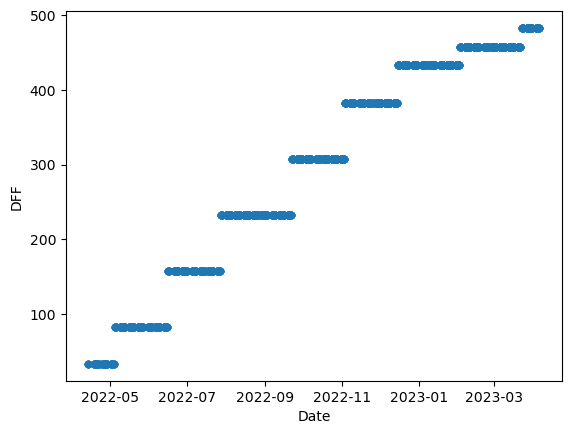

In [119]:
smalldf.plot.scatter('Date', 'DFF');

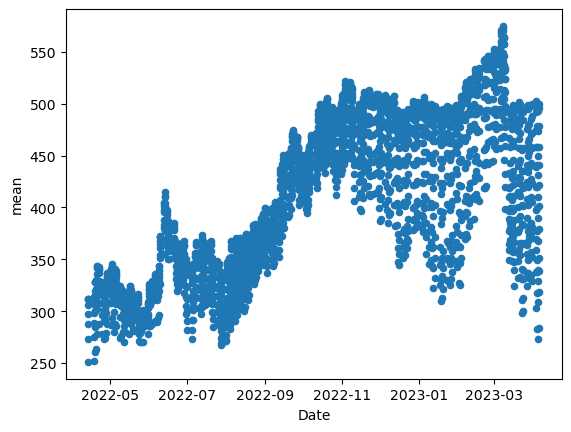

In [120]:
smalldf.plot.scatter('Date', 'mean');

In [121]:
new_df = df.pivot(index='Date', columns='contract', values='mean')

new_df = new_df.join(ffr.set_index('Date'), on='Date')

In [122]:
[i for i in new_df.columns if i != 'DFF']

[Timestamp('2022-12-14 00:00:00'),
 Timestamp('2023-02-01 00:00:00'),
 Timestamp('2023-03-22 00:00:00'),
 Timestamp('2023-05-03 00:00:00'),
 Timestamp('2023-06-14 00:00:00'),
 Timestamp('2023-07-26 00:00:00'),
 Timestamp('2023-09-20 00:00:00'),
 Timestamp('2023-11-01 00:00:00'),
 Timestamp('2023-12-13 00:00:00'),
 Timestamp('2024-01-31 00:00:00'),
 Timestamp('2024-03-20 00:00:00'),
 Timestamp('2024-05-01 00:00:00'),
 Timestamp('2024-06-19 00:00:00'),
 Timestamp('2024-07-31 00:00:00'),
 Timestamp('2024-09-25 00:00:00')]

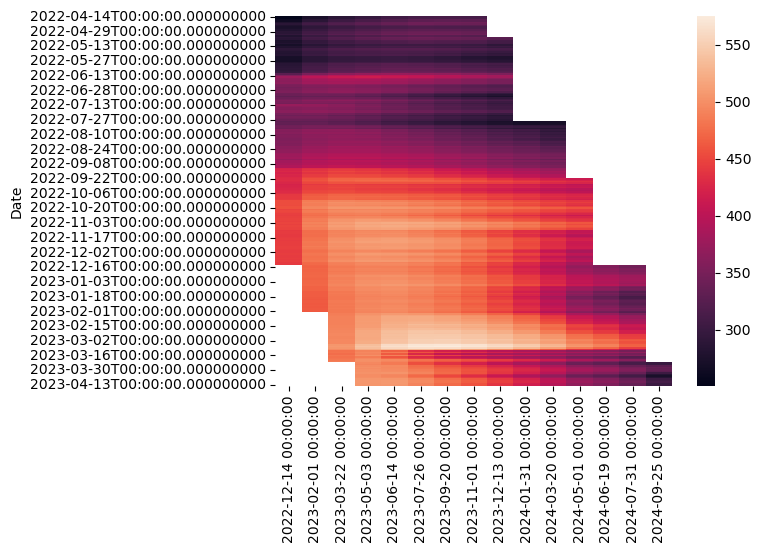

In [123]:
import seaborn as sns
sns.heatmap(new_df[[i for i in new_df.columns if i != 'DFF']]);

In [124]:
import plotly.graph_objects as go

In [125]:
x = [i for i in new_df.columns if i != 'DFF']
y = new_df.index
z = new_df.to_numpy()

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='FFR Curves',
                  width = 1200,
                  height = 1200,
                  scene = {"aspectratio": {"x": 1, "y": 1, "z": .6}})
fig.update_coloraxes(cauto=True)
#fig.update_coloraxes(cmax=2000)
#fig.update_coloraxes(cmin=2000)
fig.show()

# Cohorting

In [126]:
contractvals = sorted(list({i for i in df.contract}))

In [127]:
contractvals

[Timestamp('2022-12-14 00:00:00'),
 Timestamp('2023-02-01 00:00:00'),
 Timestamp('2023-03-22 00:00:00'),
 Timestamp('2023-05-03 00:00:00'),
 Timestamp('2023-06-14 00:00:00'),
 Timestamp('2023-07-26 00:00:00'),
 Timestamp('2023-09-20 00:00:00'),
 Timestamp('2023-11-01 00:00:00'),
 Timestamp('2023-12-13 00:00:00'),
 Timestamp('2024-01-31 00:00:00'),
 Timestamp('2024-03-20 00:00:00'),
 Timestamp('2024-05-01 00:00:00'),
 Timestamp('2024-06-19 00:00:00'),
 Timestamp('2024-07-31 00:00:00'),
 Timestamp('2024-09-25 00:00:00')]

In [128]:
smalldf2 = smalldf
smalldf2['dtm'] = (smalldf2.contract - smalldf2.Date)

In [129]:
smalldf2

,Date,contract,DFF,btcopen,btcvolume,mean,dtm
0,2022-04-14,2022-12-14,33.0,41160.218750,2.434200e+10,251.000000,244 days
1,2022-04-18,2022-12-14,33.0,39721.203125,3.370518e+10,251.749925,240 days
2,2022-04-19,2022-12-14,33.0,40828.175781,2.530321e+10,260.749975,239 days
3,2022-04-20,2022-12-14,33.0,41501.746094,2.781953e+10,263.750000,238 days
4,2022-04-21,2022-12-14,33.0,41371.515625,3.537279e+10,277.749950,237 days
...,...,...,...,...,...,...,...
6,2023-03-31,2024-09-25,483.0,28032.261719,1.900133e+10,329.500950,544 days
7,2023-04-03,2024-09-25,483.0,28183.080078,1.955650e+10,303.001062,541 days
8,2023-04-04,2024-09-25,483.0,27795.273438,1.528454e+10,282.750288,540 days
9,2023-04-05,2024-09-25,483.0,28169.726562,1.705232e+10,273.500675,539 days


In [130]:
from datetime import datetime
smalldf2.dtm = smalldf2.dtm.dt.days

In [131]:
smalldf2.dtm

0     244
1     240
2     239
3     238
4     237
     ... 
6     544
7     541
8     540
9     539
10    538
Name: dtm, Length: 2694, dtype: int64

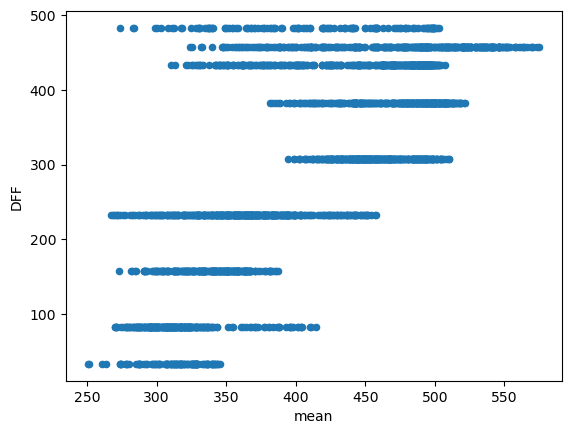

In [132]:
# useless
smalldf.plot.scatter('mean', 'DFF');

In [133]:
smalldf2['diff'] = smalldf2['mean'] - smalldf2.DFF

In [134]:
smalldf2

,Date,contract,DFF,btcopen,btcvolume,mean,dtm,diff
0,2022-04-14,2022-12-14,33.0,41160.218750,2.434200e+10,251.000000,244,218.000000
1,2022-04-18,2022-12-14,33.0,39721.203125,3.370518e+10,251.749925,240,218.749925
2,2022-04-19,2022-12-14,33.0,40828.175781,2.530321e+10,260.749975,239,227.749975
3,2022-04-20,2022-12-14,33.0,41501.746094,2.781953e+10,263.750000,238,230.750000
4,2022-04-21,2022-12-14,33.0,41371.515625,3.537279e+10,277.749950,237,244.749950
...,...,...,...,...,...,...,...,...
6,2023-03-31,2024-09-25,483.0,28032.261719,1.900133e+10,329.500950,544,-153.499050
7,2023-04-03,2024-09-25,483.0,28183.080078,1.955650e+10,303.001062,541,-179.998938
8,2023-04-04,2024-09-25,483.0,27795.273438,1.528454e+10,282.750288,540,-200.249712
9,2023-04-05,2024-09-25,483.0,28169.726562,1.705232e+10,273.500675,539,-209.499325


In [135]:
smalldf2.dtypes

Date         datetime64[ns]
contract     datetime64[ns]
DFF                 float64
btcopen             float64
btcvolume           float64
mean                float64
dtm                   int64
diff                float64
dtype: object

In [136]:

import plotly.express as px
fig = px.scatter_3d(smalldf2, x='Date', y='contract', z='diff', color='mean', size='DFF')
fig.update_layout(title='spreads between FFR and expected FFR: by date, by contract',
                  width = 1200,
                  height = 1200,
                  scene = {"aspectratio": {"x": 1, "y": 1, "z": .6}})
fig.update_coloraxes(cauto=True)
fig.show()

In [137]:
# premium if you're buying the contract (more time you have (orange and yellow) premium for cost of time when you don't know future rates)

In [138]:
smalldf2.Date.dtype

dtype('<M8[ns]')

In [139]:
smalldf2

,Date,contract,DFF,btcopen,btcvolume,mean,dtm,diff
0,2022-04-14,2022-12-14,33.0,41160.218750,2.434200e+10,251.000000,244,218.000000
1,2022-04-18,2022-12-14,33.0,39721.203125,3.370518e+10,251.749925,240,218.749925
2,2022-04-19,2022-12-14,33.0,40828.175781,2.530321e+10,260.749975,239,227.749975
3,2022-04-20,2022-12-14,33.0,41501.746094,2.781953e+10,263.750000,238,230.750000
4,2022-04-21,2022-12-14,33.0,41371.515625,3.537279e+10,277.749950,237,244.749950
...,...,...,...,...,...,...,...,...
6,2023-03-31,2024-09-25,483.0,28032.261719,1.900133e+10,329.500950,544,-153.499050
7,2023-04-03,2024-09-25,483.0,28183.080078,1.955650e+10,303.001062,541,-179.998938
8,2023-04-04,2024-09-25,483.0,27795.273438,1.528454e+10,282.750288,540,-200.249712
9,2023-04-05,2024-09-25,483.0,28169.726562,1.705232e+10,273.500675,539,-209.499325


# Timeseries

In [140]:
from statsmodels.tsa.api import VAR

In [141]:
def plot_series(df, cols=None, title='Title', xlab=None, ylab=None, steps=1):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    legend_list = []
    
    # Iterate through each column name.
    for col in cols:
            
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(smalldf2[col])
        legend_list.append(col)
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.yticks(fontsize=18)
    plt.xticks(df.index[0::steps], fontsize=18)
    
    plt.legend(legend_list);

In [142]:
'''plot_series(smalldf2,
            ['btcopen'],
            title=" price",
            steps=50)
'''

'plot_series(smalldf2,\n            [\'btcopen\'],\n            title=" price",\n            steps=50)\n'

# Dickey Fuller

In [143]:
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:3], index=['Test Statistic','p-value', 'Lag Used'])
    return dfoutput

In [144]:
interpret_dftest(adfuller(smalldf2['btcopen']))

Test Statistic   -6.609859e+00
p-value           6.417493e-09
Lag Used          2.500000e+01
dtype: float64

# Regressions
This LR is just a placeholder, i don't appreciate the methodology

In [145]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LinearRegression

In [146]:
smalldf2

,Date,contract,DFF,btcopen,btcvolume,mean,dtm,diff
0,2022-04-14,2022-12-14,33.0,41160.218750,2.434200e+10,251.000000,244,218.000000
1,2022-04-18,2022-12-14,33.0,39721.203125,3.370518e+10,251.749925,240,218.749925
2,2022-04-19,2022-12-14,33.0,40828.175781,2.530321e+10,260.749975,239,227.749975
3,2022-04-20,2022-12-14,33.0,41501.746094,2.781953e+10,263.750000,238,230.750000
4,2022-04-21,2022-12-14,33.0,41371.515625,3.537279e+10,277.749950,237,244.749950
...,...,...,...,...,...,...,...,...
6,2023-03-31,2024-09-25,483.0,28032.261719,1.900133e+10,329.500950,544,-153.499050
7,2023-04-03,2024-09-25,483.0,28183.080078,1.955650e+10,303.001062,541,-179.998938
8,2023-04-04,2024-09-25,483.0,27795.273438,1.528454e+10,282.750288,540,-200.249712
9,2023-04-05,2024-09-25,483.0,28169.726562,1.705232e+10,273.500675,539,-209.499325


In [147]:
dummies = ['contract']

In [148]:
smalldf3 = pd.get_dummies(data = smalldf2, columns = dummies, drop_first = True)

In [149]:
xvars = [i for i in smalldf3.columns if i != 'btcopen' and i != 'Date']

In [150]:
X = smalldf3[xvars]
y = smalldf3['btcopen']

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [152]:
lr = LinearRegression()

lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.5429312647047286
0.5387096736200531


<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'> <class 'numpy.ndarray'>


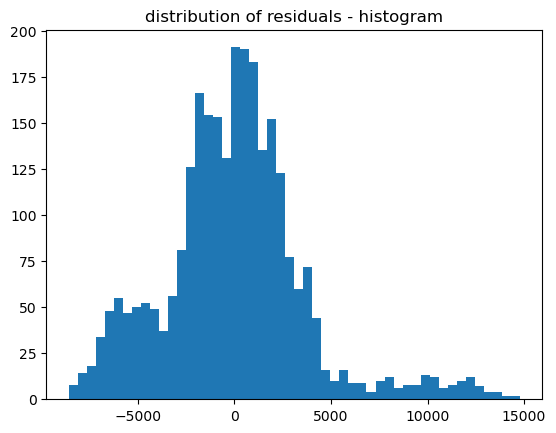

In [155]:
yhat = lr.predict(X)

residuals = y - yhat

plt.hist(residuals, bins = 50);
plt.title('distribution of residuals - histogram');
#residuals are.... kind of normal, mean is not 0

print(type(y), type(residuals), type(yhat))

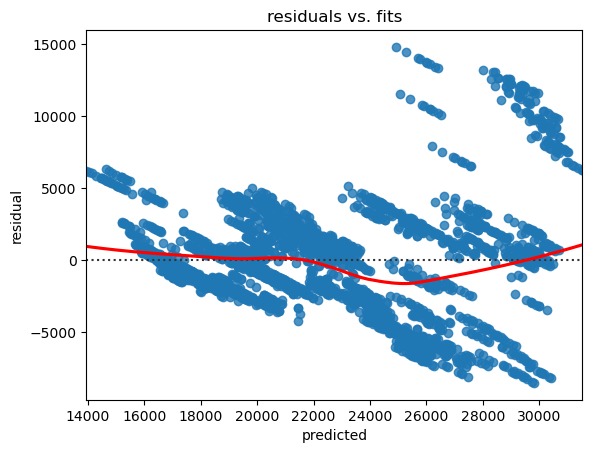

In [157]:
sns.residplot(x = yhat,
              y = residuals,
              lowess = True, #help visualize relationship
              line_kws = {'color':'red'})\
    .set(title = 'residuals vs. fits',
        xlabel = 'predicted',
        ylabel = 'residual');

# hmm